# Generate Summary Manhattan Plots 
Show mutation trends over time

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from sklearn.neighbors import KernelDensity as KDE


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Read in PyR0 data

In [2]:
filename = '../data/processed/PyR0_Ranked_Mutations.tsv'
pyro_ranked_muts = pd.read_csv(filename, sep='\t')

def extract_pos(mut):
    mut = mut.split(':')[1]
    pos = ''.join(np.array(list(mut))[[char.isnumeric() for char in list(mut)]])
    return int(pos)

pyro_ranked_muts['gene'] = pyro_ranked_muts['mutation'].apply(lambda x: x.split(':')[0])
pyro_ranked_muts['position'] = pyro_ranked_muts['mutation'].apply(extract_pos)
pyro_ranked_muts['gene'].unique()

def add_most_recent_rank(df):
    latest_run = max(pd.to_datetime(df['Run date']))
    latest_ranking = df[df['Run date'] == dt.strftime(latest_run, '%Y-%m-%d')][['mutation', 'rank']]
    return pd.merge(df, latest_ranking, on='mutation', suffixes=['', ' most recent'])

pyro_ranked_muts = add_most_recent_rank(pyro_ranked_muts)

In [3]:
pyro_ranked_muts.head()

,rank,mutation,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages,Run date,gene,position,rank most recent
0,1,S:R346K,4611.43,4617700.0,0.094890,0.094850,0.094930,1.09954,1.09949,1.09958,"A.30, AY.33.2 (B.1.617.2.33.2), B.1.415.1, B.1...",2021-03-12,S,346,90
1,1,S:R346K,5317.05,6138970.0,0.098483,0.098447,0.098520,1.10350,1.10346,1.10354,"A.30, AY.33.2 (B.1.617.2.33.2), B.1.415.1, B.1...",2021-03-17,S,346,90
2,1,S:R346K,4287.46,3991670.0,0.100718,0.100672,0.100764,1.10596,1.10591,1.10602,"A.30, AY.33.2 (B.1.617.2.33.2), B.1.415.1, B.1...",2021-03-26,S,346,90
3,1,S:R346K,5282.73,6059990.0,0.104844,0.104805,0.104883,1.11054,1.11049,1.11058,"A.30, AY.33.2 (B.1.617.2.33.2), B.1.415.1, B.1...",2021-03-31,S,346,90
4,1,S:R346K,5171.73,5807990.0,0.105375,0.105335,0.105415,1.11113,1.11108,1.11117,"A.30, AY.33.2 (B.1.617.2.33.2), B.1.415.1, B.1...",2021-04-09,S,346,90


## Plot Manhattans

In [4]:
def setup(df):
    num_genes = len(df['gene'].unique())
    fig, axes = plt.subplots(num_genes*2, 1, figsize=(7, 7*num_genes), gridspec_kw={'height_ratios': [5, 2]*num_genes})
    
def plot_manhattan_topn(ax, gene, df, n, t):
    gene_df = df[df['gene']==gene].reset_index(drop=True)
    top_n = gene_df[gene_df['rank most recent'] <= n]
    
    # t_most_recent = 
        
    colors = ['xkcd:light lavendar', 'xkcd:light violet', 'xkcd:lilac', 'xkcd:lavender', 
              'xkcd:liliac', 'xkcd:light purple', 'xkcd:bright lavender', 'xkcd:bright purple', 
              'xkcd:m', 'xkcd:barney', 'xkcd:barney purple', 'xkcd:plum purple'][:n]
    purplePalette = sns.set_palette(sns.color_palette(colors))
    autoPurple = sns.set_palette(sns.light_palette("xkcd:bright purple", n))
    
    sns.scatterplot(x='position',
                y='Δ log R',
                hue='Run date',
                palette=autoPurple, #purplePalette,
                data=top_n,
                s=10,
                alpha=0.5,
                ax=ax)
    return top_n

<AxesSubplot: xlabel='position', ylabel='Δ log R'>

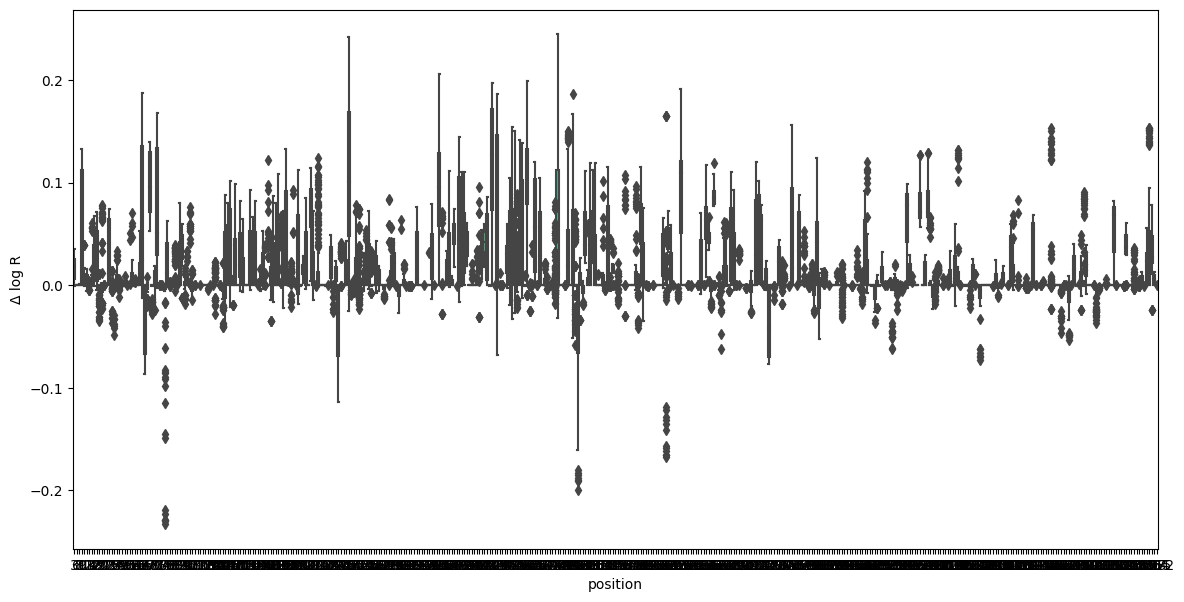

In [5]:
fig, ax = plt.subplots(figsize=(14,7))
sns.boxplot(x='position',
            y='Δ log R',
            data=pyro_ranked_muts[pyro_ranked_muts['gene']=='S'],
            ax=ax)

<AxesSubplot: xlabel='position', ylabel='Δ log R'>

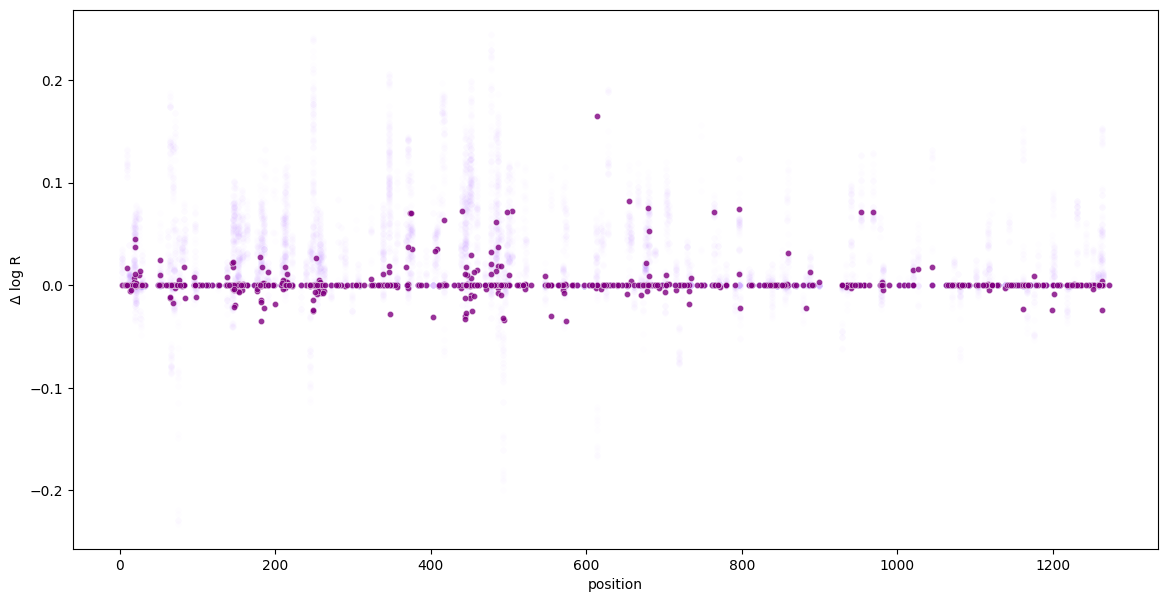

In [6]:
fig, ax = plt.subplots(figsize=(14,7))
sns.scatterplot(x='position',
                y='Δ log R',
                data=pyro_ranked_muts[pyro_ranked_muts['gene']=='S'],
                s=20,
                alpha=0.01,
                color='xkcd:bright lavender',
                ax=ax)
S = pyro_ranked_muts[pyro_ranked_muts['gene']=='S']
sns.scatterplot(x='position',
                y='Δ log R',
                data=S[S['Run date']=='2023-10-30'],
                s=20,
                alpha=0.8,
                color='purple',
                ax=ax)

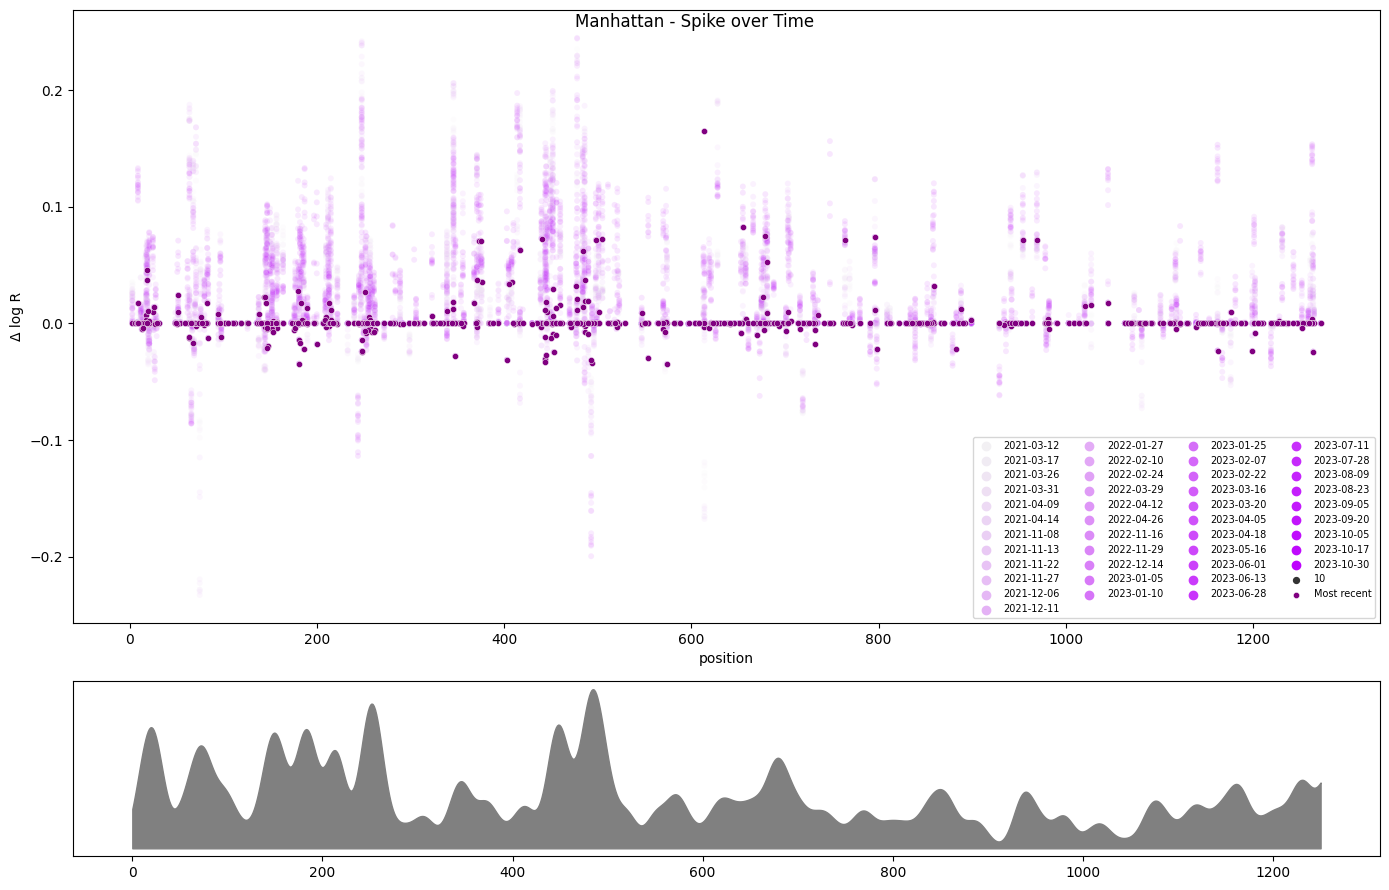

In [7]:
S = pyro_ranked_muts[pyro_ranked_muts['gene']=='S']


fig, axes = plt.subplots(2,1, figsize=(14,9), gridspec_kw={'height_ratios': [7, 2]})

ax = axes[0]
sns.scatterplot(x='position',
                y='Δ log R',
                hue='Run date',
                data=S,
                palette=sns.set_palette(sns.light_palette("xkcd:bright purple", 43)),
                size=10,
                alpha=0.1,
                color='xkcd:bright lavender',
                ax=ax)
sns.scatterplot(x='position',
                y='Δ log R',
                # hue='Run date',
                data=S[S['Run date']=='2023-10-30'],
                palette=sns.set_palette(sns.light_palette("xkcd:bright purple", 43)),
                s=20,
                alpha=1,
                color='purple',
                label='Most recent',
                ax=ax)

ax.legend(ncol=4, fontsize=7)

ax = axes[1]
ax.set_yticks([])
def plot_density(ax, positions):
    xlim = [0, 1250]
    num_points=1000
    # Fit KDE
    kde = KDE(kernel='gaussian', bandwidth=10).fit(np.array(positions).reshape(-1,1))
    x = np.linspace(xlim[0], xlim[1], num_points).reshape(-1,1)
    # Generate KDE curve
    y = np.exp(kde.score_samples(x))
    
    ax.fill_between(x.flatten(), np.zeros_like(y), y, color='gray')
    
    return kde

kde = plot_density(axes[1], S['position'].tolist())


fig.tight_layout()
fig.suptitle('Manhattan - Spike over Time');
fig.savefig('../figs/DRAFT1_Manhattan_S.png', dpi=150);

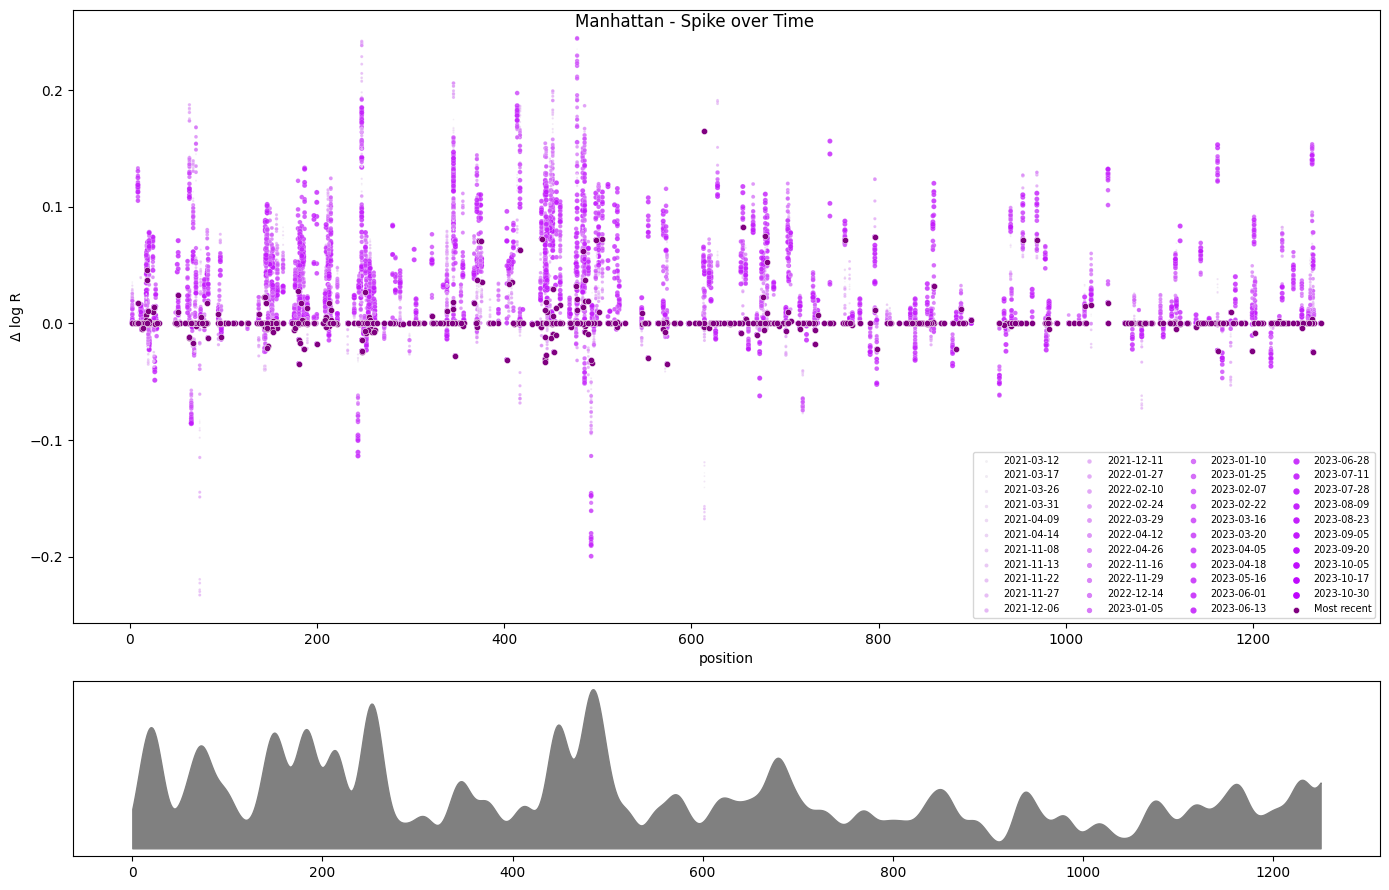

In [8]:
S = pyro_ranked_muts[pyro_ranked_muts['gene']=='S']


fig, axes = plt.subplots(2,1, figsize=(14,9), gridspec_kw={'height_ratios': [7, 2]})

ax = axes[0]
sns.scatterplot(x='position',
                y='Δ log R',
                hue='Run date',
                data=S,
                palette=sns.set_palette(sns.light_palette("xkcd:bright purple", 43)),
                size='Run date',
                sizes=(15,1),
                alpha=0.8,
                color='xkcd:bright lavender',
                ax=ax)
sns.scatterplot(x='position',
                y='Δ log R',
                # hue='Run date',
                data=S[S['Run date']=='2023-10-30'],
                palette=sns.set_palette(sns.light_palette("xkcd:bright purple", 43)),
                s=20,
                alpha=1,
                color='purple',
                label='Most recent',
                ax=ax)

ax.legend(ncol=4, fontsize=7)

ax = axes[1]
ax.set_yticks([])
def plot_density(ax, positions):
    xlim = [0, 1250]
    num_points=1000
    # Fit KDE
    kde = KDE(kernel='gaussian', bandwidth=10).fit(np.array(positions).reshape(-1,1))
    x = np.linspace(xlim[0], xlim[1], num_points).reshape(-1,1)
    # Generate KDE curve
    y = np.exp(kde.score_samples(x))
    
    ax.fill_between(x.flatten(), np.zeros_like(y), y, color='gray')
    
    return kde

kde = plot_density(axes[1], S['position'].tolist())


fig.tight_layout()
fig.suptitle('Manhattan - Spike over Time');
fig.savefig('../figs/DRAFT2_Manhattan_S.png', dpi=150);

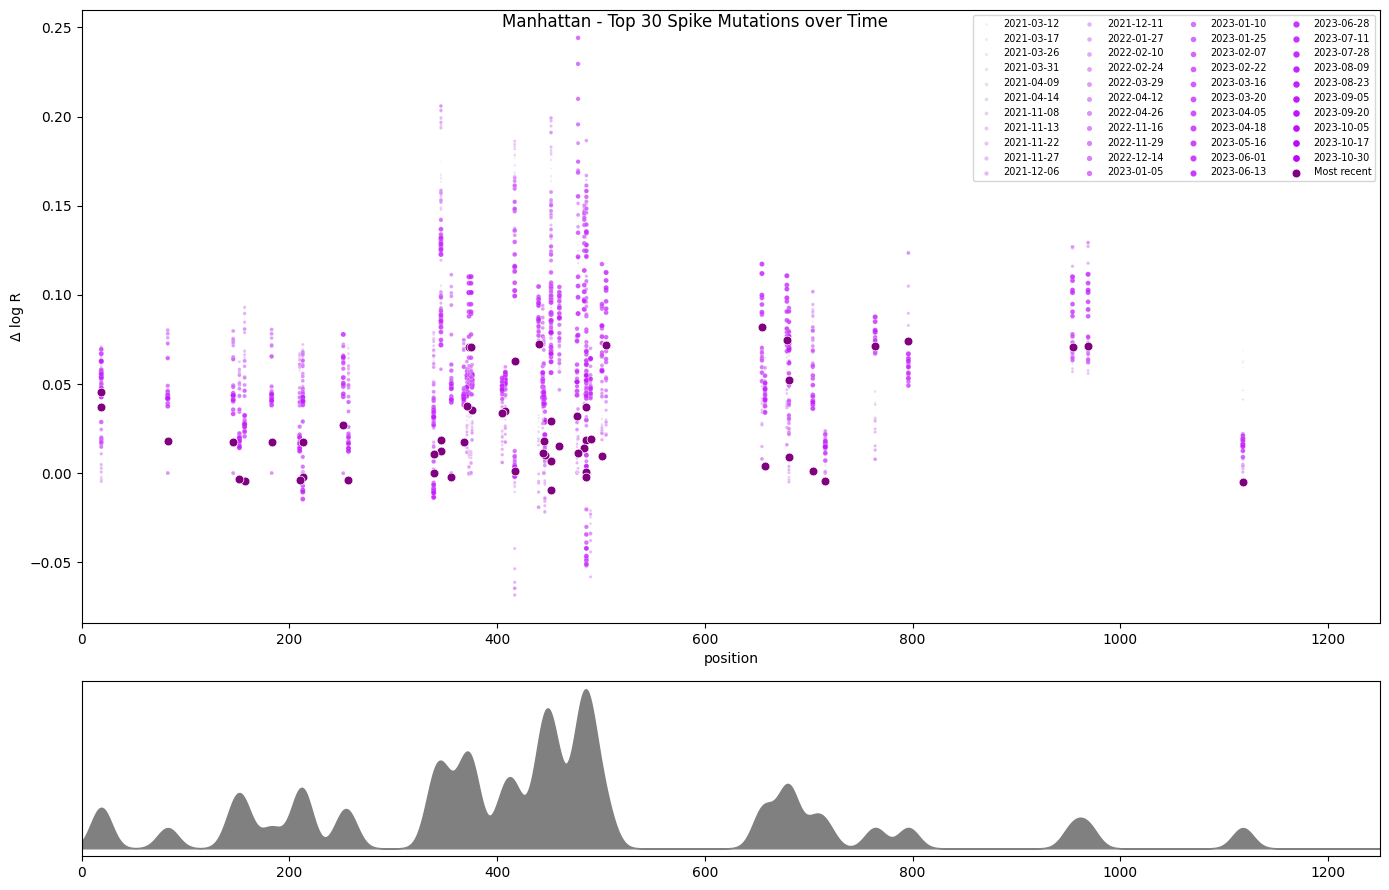

In [9]:
n = 30
top_muts = S[S['rank']<=n].mutation.unique()
N = S[S['mutation'].isin(top_muts)]


fig, axes = plt.subplots(2,1, figsize=(14,9), gridspec_kw={'height_ratios': [7, 2]})

ax = axes[0]
xlim = [0, 1250]
sns.scatterplot(x='position',
                y='Δ log R',
                hue='Run date',
                data=N,
                palette=sns.set_palette(sns.light_palette("xkcd:bright purple", 43)),
                size='Run date',
                sizes=(15,1),
                alpha=0.8,
                color='xkcd:bright lavender',
                ax=ax)
sns.scatterplot(x='position',
                y='Δ log R',
                # hue='Run date',
                data=N[N['Run date']=='2023-10-30'],
                palette=sns.set_palette(sns.light_palette("xkcd:bright purple", 43)),
                s=40,
                alpha=1,
                color='purple',
                label='Most recent',
                ax=ax)
ax.set_xlim(xlim)
ax.legend(ncol=4, fontsize=7)

ax = axes[1]
ax.set_yticks([])
def plot_density(ax, positions):
    xlim = [0, 1250]
    num_points=1000
    # Fit KDE
    kde = KDE(kernel='gaussian', bandwidth=10).fit(np.array(positions).reshape(-1,1))
    x = np.linspace(xlim[0], xlim[1], num_points).reshape(-1,1)
    # Generate KDE curve
    y = np.exp(kde.score_samples(x))
    
    ax.fill_between(x.flatten(), np.zeros_like(y), y, color='gray')
    ax.set_xlim(xlim)
    
    return kde

kde = plot_density(axes[1], N['position'].tolist())


fig.tight_layout()
fig.suptitle(f'Manhattan - Top {n} Spike Mutations over Time');
fig.savefig(f'../figs/DRAFT1_Manhattan_S_top{n}.png', dpi=150);

#### Animate KDE

In [53]:
kde_df = pd.DataFrame()
num_points = 1000
xlim = [0, 1250]
for d in sorted(S['Run date'].unique()):
    # get position data
    positions = S[S['Run date']==d]['position'].tolist()
    kde = KDE(kernel='gaussian', bandwidth=25).fit(np.array(positions).reshape(-1,1))
    x = np.linspace(xlim[0], xlim[1], num_points).reshape(-1,1)
    y = np.exp(kde.score_samples(x))
    
    kde_now = pd.DataFrame({
                'position':x.flatten(),
                'density':y,
                'date':d})
    kde_df = pd.concat([kde_df,kde_now])
    
    
# Create animated scatter plot
fig = px.line(
    kde_df, x='position', y='density',
    animation_frame='date',
    animation_group='position',
    line_shape='linear',
    range_x=xlim,
    range_y=[0, 0.002],  # Adjust the y-axis range as needed
    labels={'Scores': 'Score'},
    title='Spike Mutated Positions Over Time'
)

fig.update_traces(fill='tozeroy', fillcolor='#636EFA')


# Set height and width
fig.update_layout(
    height=1000,  # Specify the height in pixels
    width=1000# 1600,   # Specify the width in pixels
    # plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
    # paper_bgcolor='rgba(0,0,0,0)',  # Set paper background color to transparent
    # showlegend=False,  # Hide legend
)

# # Remove grid lines
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False, zeroline=True)

# Save the animated figure as an HTML file
fig.write_html('../figs/manhattan_kde_animation-S.html')

In [54]:
ORF1a = pyro_ranked_muts[pyro_ranked_muts['gene']=='ORF1a']

kde_df = pd.DataFrame()
num_points = 1000
xlim = [0, 4400]
for d in sorted(ORF1a['Run date'].unique()):
    # get position data
    positions = ORF1a[ORF1a['Run date']==d]['position'].tolist()
    kde = KDE(kernel='gaussian', bandwidth=75).fit(np.array(positions).reshape(-1,1))
    x = np.linspace(xlim[0], xlim[1], num_points).reshape(-1,1)
    y = np.exp(kde.score_samples(x))
    
    kde_now = pd.DataFrame({
                'position':x.flatten(),
                'density':y,
                'date':d})
    kde_df = pd.concat([kde_df,kde_now])
    
    
# Create animated scatter plot
fig = px.line(
    kde_df, x='position', y='density',
    animation_frame='date',
    animation_group='position',
    line_shape='linear',
    range_x=xlim,
    range_y=[0, 0.0005],  # Adjust the y-axis range as needed
    labels={'Scores': 'Score'},
    title='ORF1a Mutated Positions Over Time'
)

fig.update_traces(fill='tozeroy', fillcolor='#636EFA')


# Set height and width
fig.update_layout(
    height=1000,  # Specify the height in pixels
    width=1000# 1600,   # Specify the width in pixels
    # plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
    # paper_bgcolor='rgba(0,0,0,0)',  # Set paper background color to transparent
    # showlegend=False,  # Hide legend
)

# # Remove grid lines
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False, zeroline=True)

# Save the animated figure as an HTML file
fig.write_html('../figs/manhattan_kde_animation-ORF1a.html')